# KMeans Clustering

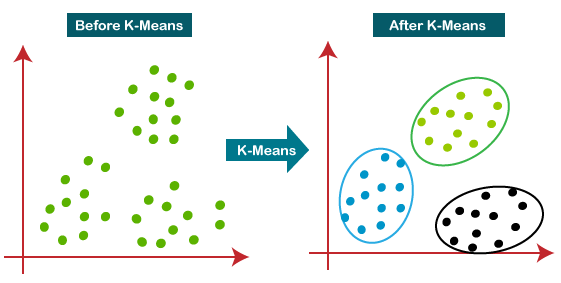

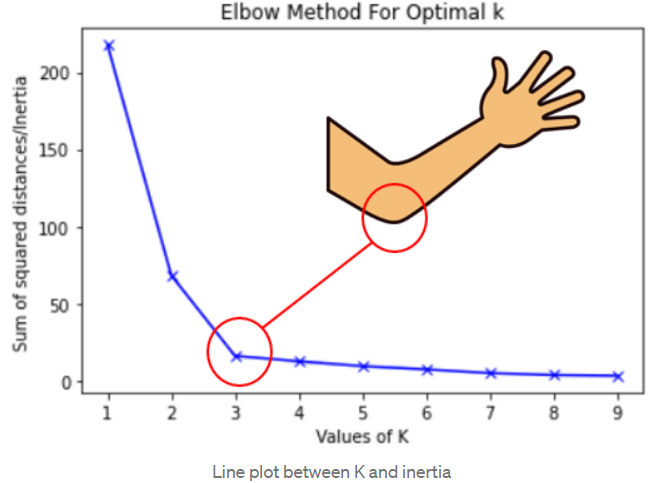

# Introduction
KMeans clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K clusters based on the features that are provided.

# Project: E-commerce Customer Segmentation

# Step 1: Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Step 2: Load Dataset

In [32]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Step 3: Data Cleaning and Preprocessing
Ensure there are no missing values and preprocess the data for clustering.

In [33]:
# Check for missing values
data.isnull().sum()

# Drop any missing values
data.dropna(inplace=True)

# Select relevant features for clustering
features = data.iloc[:,3:]
features.sample()

,Annual Income (k$),Spending Score (1-100)
5,17,76


# Step 4: Feature Scaling
Standardize the features to bring them on the same scale.

In [34]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Step 5: Determine the Optimal Number of Clusters
Use the elbow method to find the optimal number of clusters.

In [35]:
# Determine the optimal number of clusters using the elbow method

import warnings
warnings.filterwarnings('ignore')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    
    kmeans.fit(scaled_features)
    
    wcss.append(kmeans.inertia_)


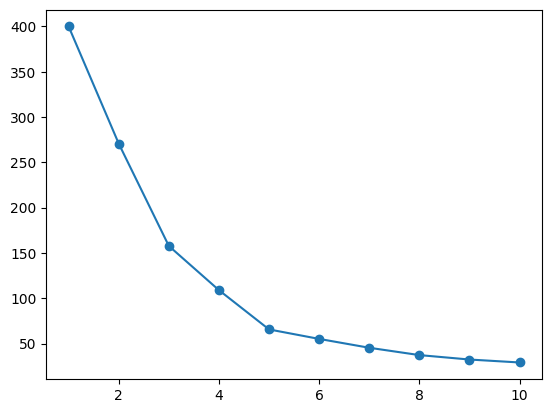

In [36]:
# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.show()


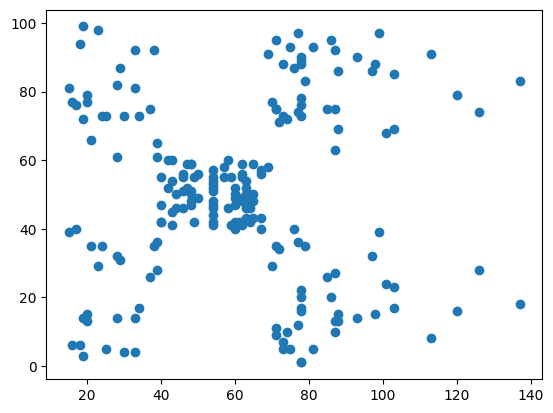

In [37]:
plt.scatter(features.iloc[:,0],
           features.iloc[:,1])
plt.show()

# Step 6: Fit the KMeans Model
Fit the KMeans model to the dataset with the chosen number of clusters.

In [38]:
import warnings
warnings.filterwarnings('ignore')

kmeans = KMeans(n_clusters=12)
kmeans.fit(scaled_features)


clusters = kmeans.predict(scaled_features)

data['Cluster'] = clusters


In [39]:
data.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,Female,35,120,79,2


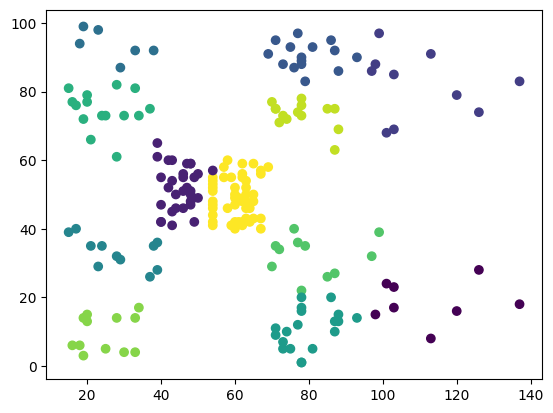

In [40]:
plt.scatter(features.iloc[:,0],
           features.iloc[:,1], 
            c = data['Cluster'])
plt.show()

# Step 7: Visualize the Clusters
Visualize the clusters to understand the segmentation.

In [41]:
# # Visualize the clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Annual Income (k$)',
#                 y='Spending Score (1-100)', 
#                 hue='Cluster',
#                 data=data, 
#                 palette='viridis', 
#                 s=100)
# plt.title('Customer Segments')
# plt.show()


# Step 8: Evaluate the Model
We can evaluate the model using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.

In [42]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, 
                                  clusters)

print(f'Silhouette Score:{silhouette_avg}')


Silhouette Score:0.4366442790267627


# Step 9: Test with Dummy Data
Create dummy data points and predict their cluster.

In [48]:
# Dummy data
dummy_data = pd.DataFrame({
    'Annual Income (k$)': [30, 80, 90],
    'Spending Score (1-100)': [40, 60, 20]
})

scaled_dummy_data = scaler.transform(dummy_data)

dummy_clusters = kmeans.predict(scaled_dummy_data)

dummy_data['Cluster'] = dummy_clusters

dummy_data


,Annual Income (k$),Spending Score (1-100),Cluster
0,30,40,5
1,80,60,10
2,90,20,6


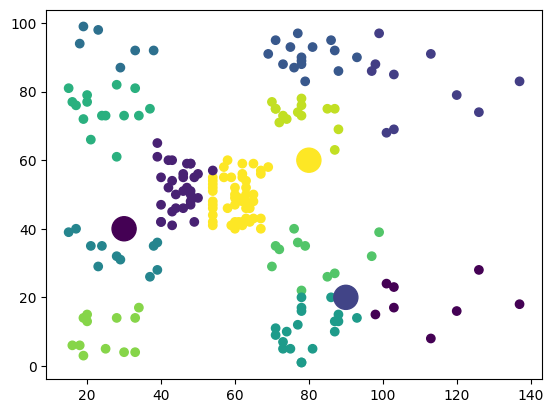

In [51]:
plt.scatter(features.iloc[:,0],
           features.iloc[:,1], 
            c = data['Cluster'])


plt.scatter(dummy_data.iloc[:,0],
           dummy_data.iloc[:,1], 
            c = dummy_data['Cluster'], s= 300)
plt.show()

In [20]:
# Visualize the clusters with dummy data







# Conclusion
KMeans clustering is a powerful tool for segmenting customers based on their purchasing behavior. In this project, we segmented e-commerce customers into different clusters based on their annual income and spending score. This segmentation can help businesses target their marketing strategies more effectively.

By following the steps outlined above, you can perform customer segmentation using KMeans clustering. The dataset, feature selection, and preprocessing are crucial steps to ensure meaningful clusters. The elbow method helps determine the optimal number of clusters, and visualizing the clusters provides insights into the different customer segments.